# Visualizing Earnings Based On College Majors

* We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.
* Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
    - Rank - Rank by median earnings (the dataset is ordered by this column).
    - Major_code - Major code.
    - Major - Major description.
    - Major_category - Category of major.
    - Total - Total number of people with major.
    - Sample_size - Sample size (unweighted) of full-time.
    - Men - Male graduates.
    - Women - Female graduates.
    - ShareWomen - Women as share of total.
    - Employed - Number employed.
    - Median - Median salary of full-time, year-round workers.
    - Low_wage_jobs - Number in low-wage service jobs.
    - Full_time - Number employed 35 hours or more.
    - Part_time - Number employed less than 35 hours.
    
* Using visualizations, we can start to explore questions from the dataset like:

    - Do students in more popular majors make more money?
    - How many majors are predominantly male? Predominantly female?
    - Which category of majors have the most students?

**1. Introduction**

In [1]:
#Setup the environment
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

#Read the dataset
recent_grads=pd.read_csv('recent-grads.csv')

#Return first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Show data structure and its summary statistics

In [2]:
print(recent_grads.head())
print(recent_grads.tail())

print(recent_grads.describe())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

Length of raw data

In [3]:
raw_data_count=recent_grads.shape[0]
print(raw_data_count)

173


Count number of null value in each column

In [4]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

We have a row with missing value in total of 172 data rows. We can remove it from out dataset because missing values will cause matplotlib to throw errors.

In [5]:
recent_grads=recent_grads.dropna(axis=0)

#Check length of recent_grads again
cleaned_data_count=recent_grads.shape[0]
print(cleaned_data_count)

172


**2. Pandas, Scatter Plots**

First we use scatter plots to explore the relations between variables.

**(1) Sample size vs Employed**

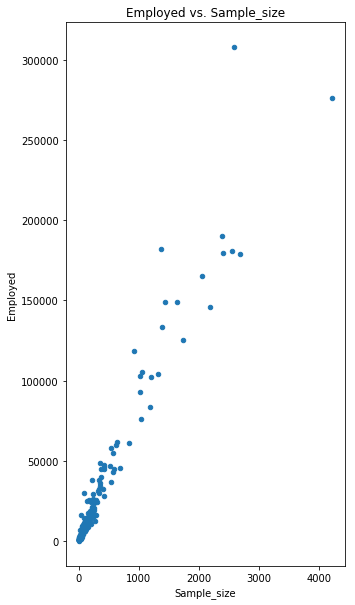

In [6]:
recent_grads.plot(x='Sample_size', y='Employed', 
                  kind='scatter',
                  title='Employed vs. Sample_size', 
                  figsize=(5,10))

**(2) Sample size vs Median**

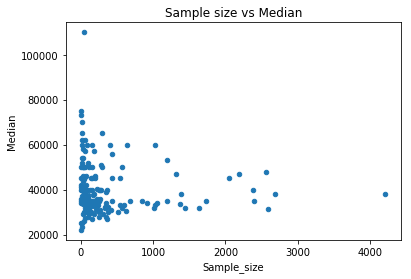

In [7]:
recent_grads.plot(x='Sample_size', y='Median',
                 kind='scatter',
                 title='Sample size vs Median')
                

Student in popular majors have average salary between 30,000 to 50,000 each year.
With majors having less than 2000 student, the dispersion of median salary is large. Median salary range from 30,000 to 60,000 per year.
For student in rare major, the salary can be very modest about 20,000 and also very outstanding of more than 110,000 a year.

**(3) Sample size vs Unemployment rate**

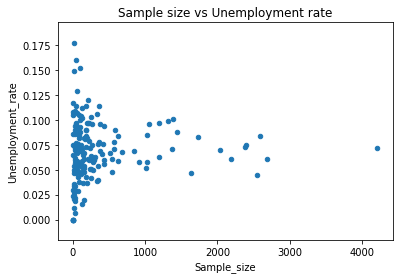

In [8]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                 kind='scatter', title='Sample size vs Unemployment rate')

The unemployment rate fluctuate around 7.5% and mostly are in range between 5% and 10%.

**(4) Full time vs Median**

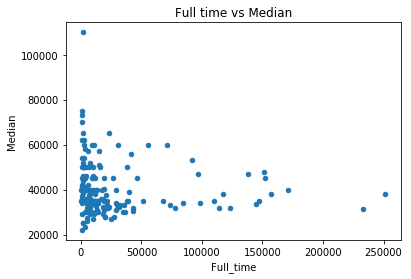

In [9]:
recent_grads.plot(x='Full_time', y='Median',
            kind='scatter', title='Full time vs Median')

When the number of full-time employees increases, the interval of median salary is narrowed.

**(5) Share women vs Unemployment rate**

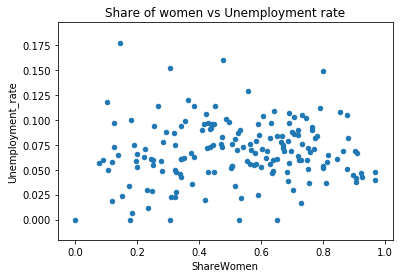

In [10]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                 kind='scatter', 
                title='Share of women vs Unemployment rate')

The share of women in a major seems not related to the unemployment rate.

**(6) Men vs Median and Women vs Median**

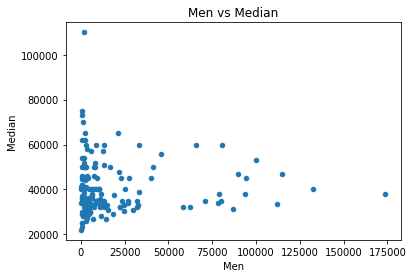

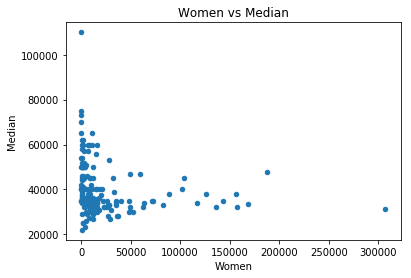

In [11]:
recent_grads.plot(x='Men', y='Median', kind='scatter',
                 title='Men vs Median')
recent_grads.plot(x='Women', y='Median', kind='scatter',
                 title='Women vs Median')

The median salary does not increase when the number of women in a major increases.

**3. Pandas, Histogram**

Generate histogams for several columns to explore the distribution of them

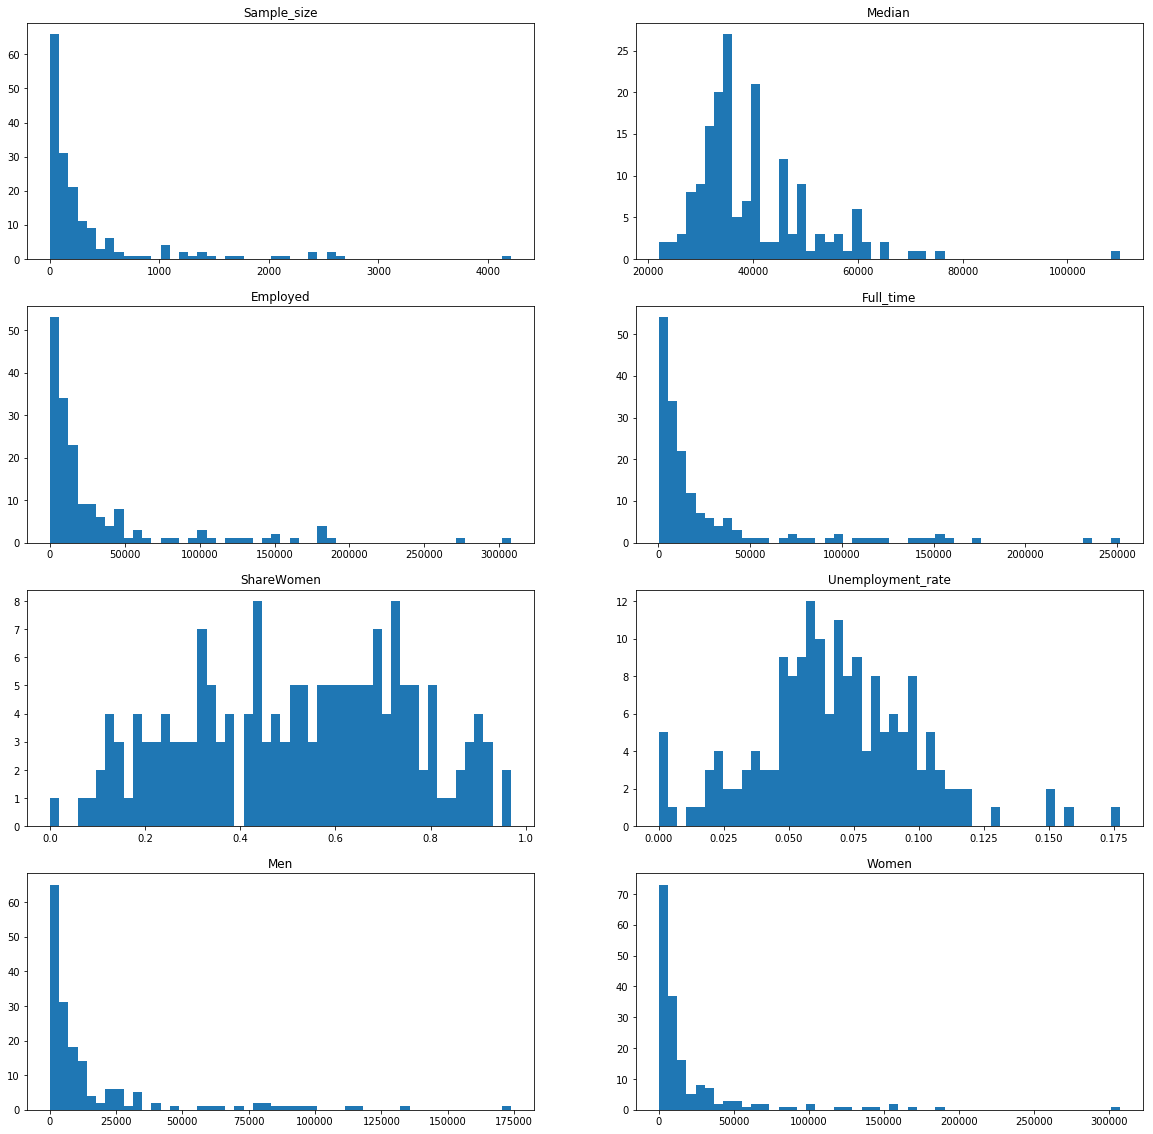

In [12]:
columns=[
    'Sample_size',
    'Median',
    'Employed',
    'Full_time',
    'ShareWomen',
    'Unemployment_rate',
    'Men',
    'Women']
fig=plt.figure(figsize=(20,20))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    ax.hist(recent_grads[columns[i]], bins=50)
    ax.set_title(columns[i])


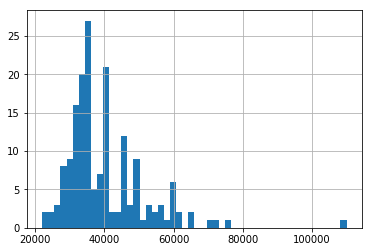

In [13]:
recent_grads['Median'].hist(bins=50)

We can see that the most common median salary range is from 30,000 to 40,000.

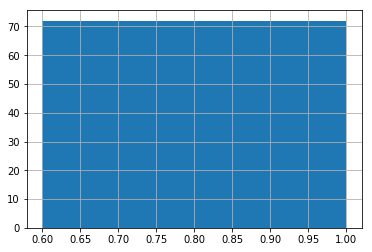

In [14]:
recent_grads['ShareWomen'].hist(bins=1, range=(0.6, 1))

About 40% of majors are predominantly female.

**3. Pandas, Scatter Matrix Plot**

Using the scatter matrix plot we can explore the relationship between variable and its distribution simultaneuously.
Let's see the plots of Sample_size and Median again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD5A130748>,
      dtype=object)

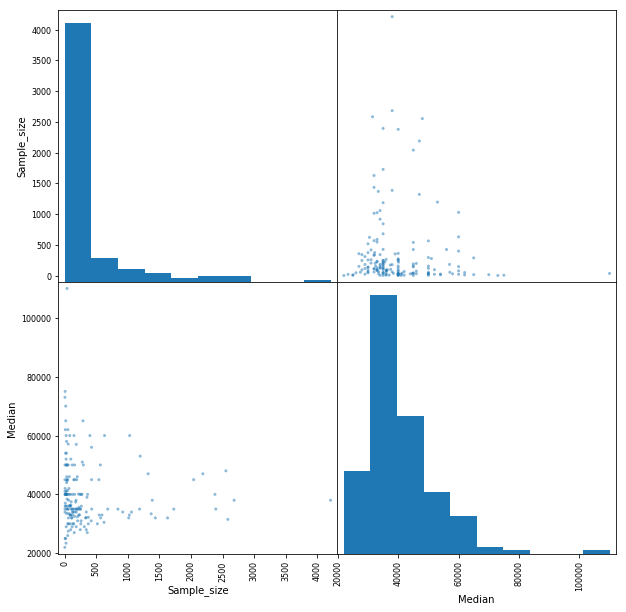

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']],
              figsize=(10,10))


Now we take a look at the relationship between the degree of popular major and the average full-time salary as well as the unemployment rate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD5A5B0978>,
      dtype=object)

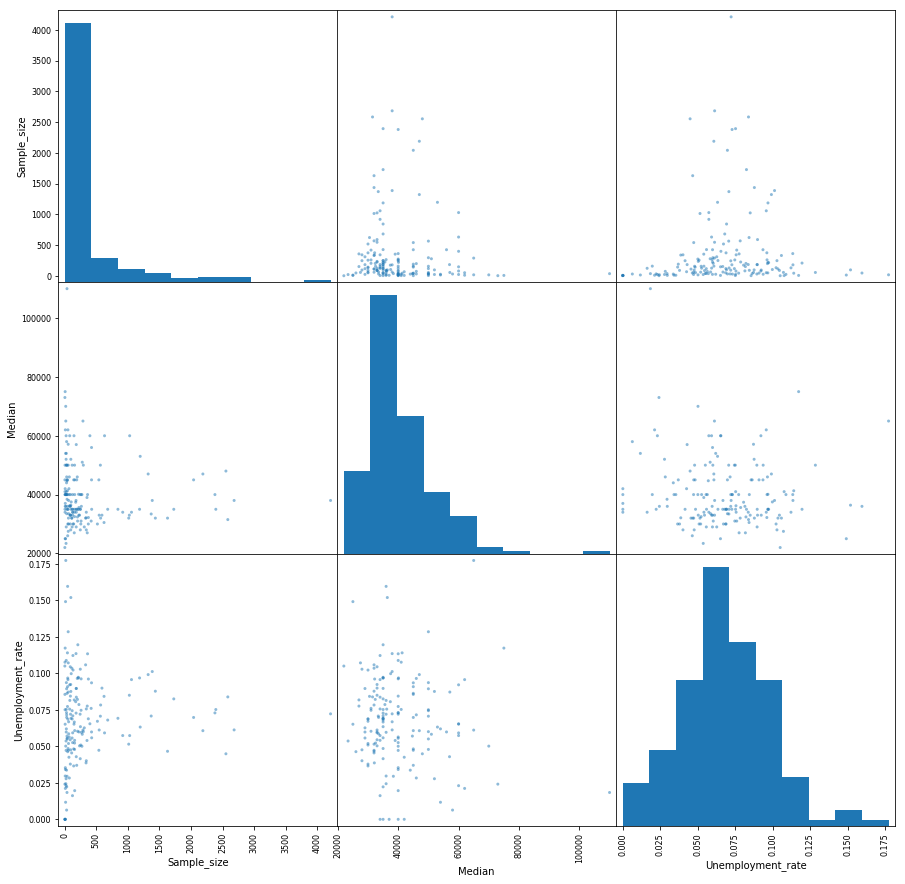

In [16]:
scatter_matrix(recent_grads[['Sample_size', 'Median',
                             'Unemployment_rate']], figsize=(15,15))

Although the popular major can not reach a very high average salary, the unemployment rate is quite low, specifically under 5%.
In contrast, the major having high median in salary indicates a high value in unemployment rate and much lower number of student.

**5. Pandas, Bar Plots**

We can specify data we want to present.

The percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

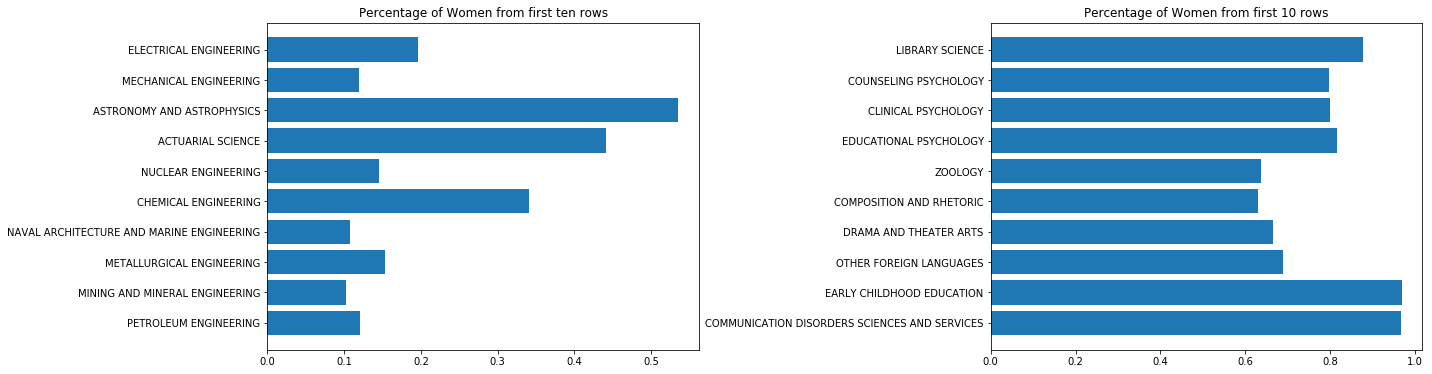

In [17]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.barh(recent_grads[:10]['Major'],recent_grads[:10]['ShareWomen'])
ax1.set_title('Percentage of Women from first ten rows')

ax2.barh(recent_grads[-10:]['Major'], recent_grads[-10:]['ShareWomen'])
ax2.set_title('Percentage of Women from first 10 rows')
plt.tight_layout(w_pad=0.3)

The unemployment rate from the first 10 rows and last 10 rows of recent_grads dataframe.

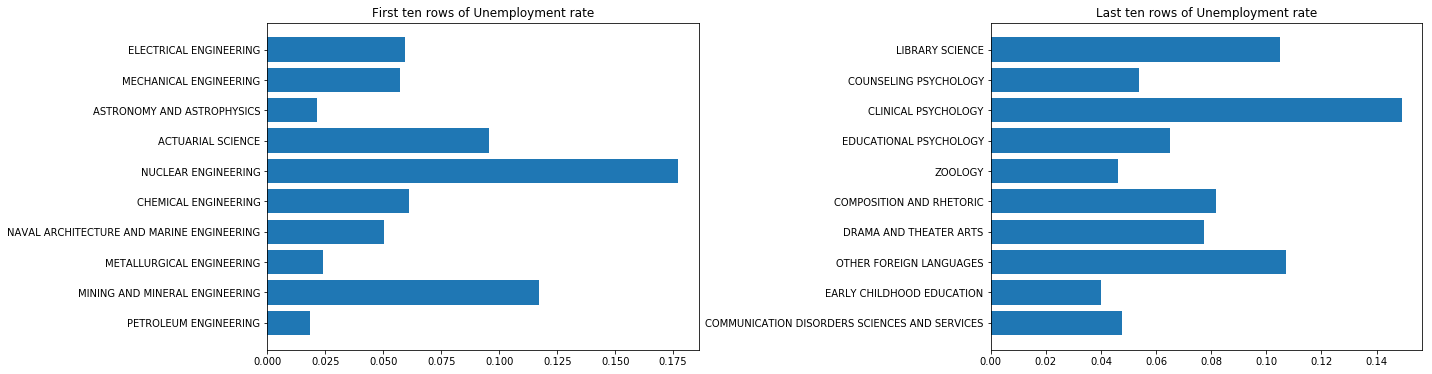

In [18]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.barh(recent_grads[:10]['Major'],recent_grads[:10]['Unemployment_rate'])
ax1.set_title('First ten rows of Unemployment rate')

ax2.barh(recent_grads[-10:]['Major'], recent_grads[-10:]['Unemployment_rate'])
ax2.set_title('Last ten rows of Unemployment rate')
plt.tight_layout(w_pad=0.3)

**6. Others**

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [19]:
#Number of men and women in each category of majors
major_groups=recent_grads.groupby('Major_category')[['Men', 'Women']].sum()
major_groups


,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


After calculate number of men and women for each group of major we can use these number to create bar plot.

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]), <a list of 9 Text xticklabel objects>)

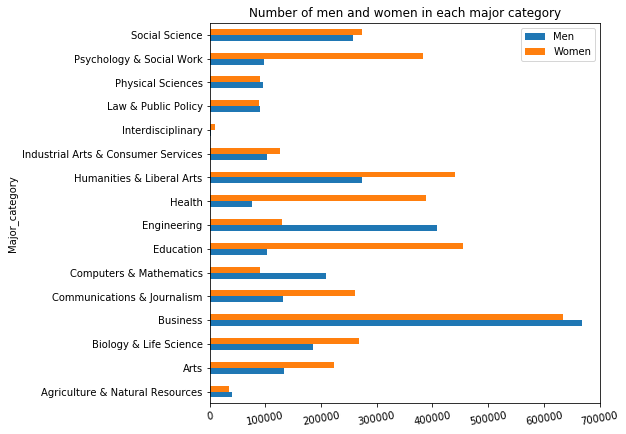

In [20]:
major_groups.plot(kind='barh', title='Number of men and women in each major category',
                 figsize=(7, 7))
plt.xticks(rotation=10)

* Use a box plot to explore the distributions of median salaries and unemployment rate.


Median                  AxesSubplot(0.125,0.125;0.352273x0.755)
Unemployment_rate    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

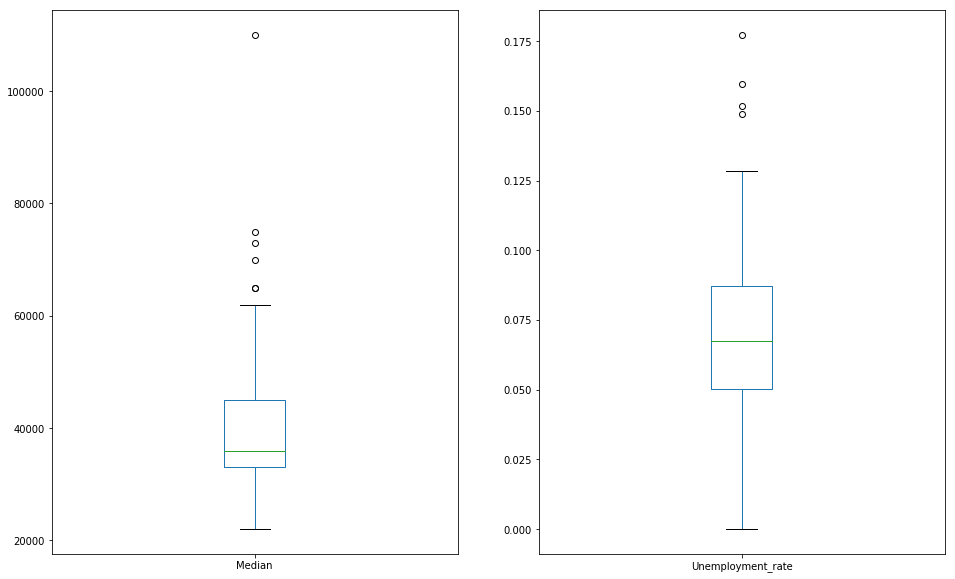

In [21]:
recent_grads[['Median', 'Unemployment_rate']].plot(kind='box', subplots=True, figsize=(16,10 ))
                                                  

* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

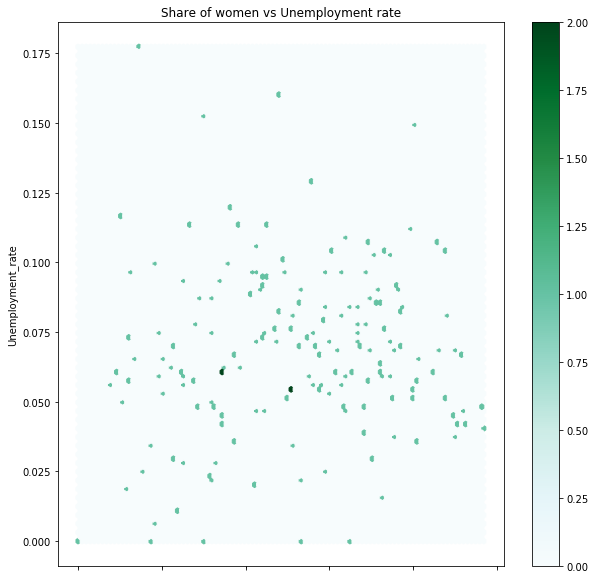

In [22]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                 kind='hexbin', 
                title='Share of women vs Unemployment rate', figsize=(10,10))